# Telegrapher's Equations
## Derivation
When creating a transmission line model in electrical engineering, it is helpful to assume that that the cable is inmperfectly insulated, as no two conductors can be perfectly insulated due to the current flow between them. That leads to two assumptions:
* Capacitance (C) is relevant
* Current Leakage (Conductance, G) is relevant

The wire itself will also imply some: 
* Resistance (R) in the wire
* Inductance (L) in the wire
    
From these assertions, the wire can be modeled as follows ([Source][wiki]):

![Model From Wikipedia](Transmission_line_element_svg.png)

From these Equations, the following model arises:
$$\frac{\partial^{2}\gamma}{\partial x^{2}} = LC\frac{\partial^{2}\gamma}{\partial t^{2}} + (RC+GL)\frac{\partial\gamma}{\partial t} + RG\gamma \tag{1}$$ 

where $\gamma \implies i(x,t), v(x,t)$ with $i(x,t)$ and $v(x,t)$ being the functions or the current and voltage, respectively. Another way to derive the equations is to ignore the Resistance and Conductance from the begining of the model. which will lead you to the following equations: 

$$\begin{gather}
\frac{\partial}{\partial x}\left[v(x,t)\right]=-L\frac{\partial}{\partial t}\left[i(x,t)\right]\tag{2}\\
\frac{\partial}{\partial x}\left[i(x,t)\right]=-C\frac{\partial}{\partial t}\left[v(x,t)\right]\tag{3}
\end{gather}$$

A more in-depth derivation can be found [here][deriv] and [here][deriv2].

For lossless transmission, we can say that the losses due to an current leakage and internal resistance go to zero. That is: 
* $ R \rightarrow 0$
* $ G \rightarrow 0$

This simplifies Equation 1 to: $$\frac{\partial^{2}\gamma}{\partial x^{2}} = LC\frac{\partial^{2}\gamma}{\partial t^{2}}\tag{4}$$

which then breaks down into either of the following two equations for voltage and current, respectively:
$$\begin{gather}
\frac{\partial^{2}}{\partial x^{2}}\left[v(x,t)\right] = LC\frac{\partial^{2}}{\partial t^{2}}\left[v(x,t)\right]\tag{5}\\
\frac{\partial^{2}}{\partial x^{2}}\left[i(x,t)\right] = LC\frac{\partial^{2}}{\partial t^{2}}\left[i(x,t)\right]\tag{6}
\end{gather}$$

Equations 2 and 3 can also become Equation 5 or 6 by using mixed partials, as shown [here][deriv2].

## Boundary Conditions
When inspecting Equations 5 or 6, the question arises: why should we expect different results for the the current and voltage? The answer lies in the boundary conditions (and only defining the boundary condition for one of the equations)!

### Voltage - $v(x,t)$
Voltage boundary conditions will be Dirichlet conditions, in that both ends of our wire segment will have a fixed voltage potential. It will be this potential that drives the current in a single direction (though the current will be of opposite sign to the voltage function). For our purposes, we will say that our wire segment is grounded at both ends. That is: $$v(0,t) = v(L,t) = 0$$ over domain/wire-segment-length $L$.

We will also need two intial conditions, one of which will be Dirichlet and the other will be Neumann. For our cases, since the voltage is fixed, it won't change in time, so the Neumann initial condition implies: $$\frac{\partial}{\partial t}[v(x,t)] = 0$$

The Dirichlet condition is tricker, as we can actual send a voltage pulse through the system and see how it responds, a voltage signal of sorts. This is the signal that will drive the voltage changes, so it doesn't make sense to have a zero-Dirichlet condition here - there'll be nothing to see in the system! Let's say that $v(0\leq x \leq L/2,0)=\alpha$, where $\alpha \neq 0$. Now we can explore how different spikes in initial voltage propogate in the system.

Discussion based upon [this source][vol-bc].

### Current - $i(x,t)$
Instead of trying to define boundary conditions and solving Equation 6, we can use either Equation 2 or 3 to find the current. This is because the same boundary conditions apply to the system.

### Dig Deeper: 
Because we are only using voltage boundary conditions, we will ensure that $\frac{V}{I} = R \neq 1$. This means that, while we neglected any resistance in the wire itself, the current and voltage will induce some resistance. This could be considered the resistance load on the wire, and can be used to determine the material to be used to determine the wire through the concept or resistivity. But note! $i(x,t)$ will not be the same array size as v(x,t). What would be some way to actually find a function for the "induced resistance" to figure out wire materials?

## Discretization
From our discussion of Boundary Conditions above, we know that the only equation we have to numerically solve is Equation 5. So let's inspect it for clues on the discretization scheme. Here's Equation 5 again: 

$$\frac{\partial^{2}}{\partial x^{2}}\left[v(x,t)\right] = LC\frac{\partial^{2}}{\partial t^{2}}\left[v(x,t)\right]\tag{5}$$

* Second order in space, so we can use a central difference scheme
* Second order in time, so we can use a central difference shcheme here as well
* Since everything is second order, we will have to use the second order Neumann Approximation (Dirichlet conditions are order-independant).

For $\frac{\partial^{2}}{\partial x^{2}}\left[v(x,t)\right]$, we start with two taylor expansions:

$$\begin{gather}
v^{n}_{i+1} = v^{n}_{i} + \left.\Delta x \frac{\partial v^{n}}{\partial x}\right|_{i} + \left.\frac{\Delta x^{2}}{2} \frac{\partial^{2} v^{n}}{\partial x^{2}}\right|_{i} + \left.\frac{\Delta x^{3}}{6} \frac{\partial^{3} v^{n}}{\partial x^{3}}\right|_{i} + \left.\frac{\Delta x^{4}}{24} \frac{\partial^{4} v^{n}}{\partial x^{4}}\right|_{i}+...\tag{7}\\
v^{n}_{i-1} = v^{n}_{i} - \left.\Delta x \frac{\partial v^{n}}{\partial x}\right|_{i} + \left.\frac{\Delta x^{2}}{2} \frac{\partial^{2} v^{n}}{\partial x^{2}}\right|_{i} - \left.\frac{\Delta x^{3}}{6} \frac{\partial^{3} v^{n}}{\partial x^{3}}\right|_{i} + \left.\frac{\Delta x^{4}}{24} \frac{\partial^{4} v^{n}}{\partial x^{4}}\right|_{i}+...\tag{8}
\end{gather}$$ 

Summing Equations 7 and 8, we get: 

$$\begin{gather}
v^{n}_{i+1} + v^{n}_{i-1} = 2v^{n}_{i} + \left.\Delta x^{2}\frac{\partial^{2} v^{n}}{\partial x^{2}}\right|_{i} + \left.\frac{\Delta x^{4}}{12} \frac{\partial^{4} v^{n}}{\partial x^{4}}\right|_{i}\tag{9}+...\\
\frac{v^{n}_{i+1} + v^{n}_{i-1} - 2v^{n}_{i}}{\Delta x^{2}} = \left.\frac{\partial^{2} v^{n}}{\partial x^{2}}\right|_{i} + \left.\frac{\Delta x^{2}}{12} \frac{\partial^{4} v^{n}}{\partial x^{4}}\right|_{i}+...\tag{10}
\end{gather}$$

Allowing $\left.\frac{\Delta x^{2}}{12} \frac{\partial^{4} v^{n}}{\partial x^{4}}\right|_{i}+... \equiv O(\Delta x^{2})$, Equation 10 then becomes:

$$\begin{gather}
\frac{v^{n}_{i+1} + v^{n}_{i-1} - 2v^{n}_{i}}{\Delta x^{2}} = \left.\frac{\partial^{2} v^{n}}{\partial x^{2}}\right|_{i} + O(\Delta x^{2})\tag{11}\\
\frac{v^{n}_{i+1} + v^{n}_{i-1} - 2v^{n}_{i}}{\Delta x^{2}} - O(\Delta x^{2}) = \left.\frac{\partial^{2} v^{n}}{\partial x^{2}}\right|_{i} \tag{12}
\end{gather}$$

Similarly, for $\frac{\partial^{2}}{\partial t^{2}}\left[v(x,t)\right]$, we start with two taylor expansions:

$$\begin{gather}
v^{n+1}_{i} = v^{n}_{i} + \left.\Delta t \frac{\partial v^{n}}{\partial t}\right|_{i} + \left.\frac{\Delta t^{2}}{2} \frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} + \left.\frac{\Delta t^{3}}{6} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i} + \left.\frac{\Delta t^{4}}{24} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+...\tag{13}\\
v^{n-1}_{i} = v^{n}_{i} - \left.\Delta t \frac{\partial v^{n}}{\partial t}\right|_{i} + \left.\frac{\Delta t^{2}}{2} \frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} - \left.\frac{\Delta t^{3}}{6} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i} + \left.\frac{\Delta t^{4}}{24} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+...\tag{14}
\end{gather}$$ 

Summing Equations 13 and 14, we get:

$$\begin{gather}
v^{n+1}_{i} + v^{n-1}_{i} = 2v^{n}_{i} + \left.\Delta t^{2}\frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} + \left.\frac{\Delta t^{4}}{12} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+...\tag{15}\\
\frac{v^{n+1}_{i} + v^{n-1}_{i} - 2v^{n}_{i}}{\Delta t^{2}} = \left.\frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} + \left.\frac{\Delta t^{2}}{12} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+...\tag{16}
\end{gather}$$

Allowing $\left.\frac{\Delta t^{2}}{12} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+... \equiv O(\Delta t^{2})$, Equation 16 then becomes:

$$\begin{gather}
\frac{v^{n+1}_{i} + v^{n-1}_{i} - 2v^{n}_{i}}{\Delta t^{2}} = \left.\frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} + O(\Delta t^{2})\tag{17}\\
\frac{v^{n+1}_{i} + v^{n-1}_{i} - 2v^{n}_{i}}{\Delta t^{2}} - O(\Delta t^{2}) = \left.\frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} \tag{18}
\end{gather}$$

Plugging in Equation 12 and Equation 18 into Equation 5, we get:

$$\begin{gather}
\frac{v^{n}_{i+1} + v^{n}_{i-1} - 2v^{n}_{i}}{\Delta x^{2}} - O(\Delta x^{2}) = LC\frac{v^{n+1}_{i} + v^{n-1}_{i} - 2v^{n}_{i}}{\Delta t^{2}} - (LC)O(\Delta t^{2})\tag{20}\\
v^{n+1}_{i} + v^{n-1}_{i} - 2v^{n}_{i}=[\frac{1}{LC}(\frac{v^{n}_{i+1} + v^{n}_{i-1} - 2v^{n}_{i}}{\Delta x^{2}} - O(\Delta x^{2})) + O(\Delta t^{2})]\Delta t^{2}\tag{21}\\
v^{n+1}_{i}= - v^{n-1}_{i} + 2v^{n}_{i} + [\frac{1}{LC}(\frac{v^{n}_{i+1} + v^{n}_{i-1} - 2v^{n}_{i}}{\Delta x^{2}} - O(\Delta x^{2})) + O(\Delta t^{2})]\Delta t^{2}\tag{22}
\end{gather}$$

Equation 22 allows us to march forward in time for each point based on information gleaned from the two immediate neighbors in space, and previous 2 iterations of the problems. These are to be handled by our boundary and initial conditions, respectively. Simplifying it some more, and noticing that $[O(\Delta t^{2})]\Delta t^{2}\equiv O(\Delta t^{4})$, we get:

$$
v^{n+1}_{i}= O(\Delta t^{4}) + (\frac{\Delta t^{2}}{LC})O(\Delta x^{2}) +\frac{\Delta t^{2}}{LC\Delta x^{2}}[v^{n}_{i+1} + v^{n}_{i-1}]- v^{n-1}_{i} + 2v^{n}_{i}[1-\frac{\Delta t^{2}}{LC\Delta x^{2}}]\tag{23}
$$

Equation 23 is our final equation, without any loss of generality and including higher order terms to account for the error. Now we can say that $O(\Delta t^{4})\ll 1$ and $(\frac{\Delta t^{2}}{LC})O(\Delta x^{2}) \ll 1$ for sufficiently small $\Delta t$ and $\Delta x$, and for the sake of coding the problem, let's allow $LC\equiv 1$. With these assumptions, our discretization reaches it's final form:

$$
v^{n+1}_{i}= \frac{\Delta t^{2}}{\Delta x^{2}}[v^{n}_{i+1} + v^{n}_{i-1}]- v^{n-1}_{i} + 2v^{n}_{i}[1-\frac{\Delta t^{2}}{\Delta x^{2}}]\tag{24}
$$

Equation 24 will be the final descritization that we will need to code for the numerical solution. The only other thing to consider is a second order Neumann initial condition.

### Second order Neumann Initial Condition

Recall Equations 13 and 14, our Taylor expansions in the Time Domain:

$$\begin{gather}
v^{n+1}_{i} = v^{n}_{i} + \left.\Delta t \frac{\partial v^{n}}{\partial t}\right|_{i} + \left.\frac{\Delta t^{2}}{2} \frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} + \left.\frac{\Delta t^{3}}{6} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i} + \left.\frac{\Delta t^{4}}{24} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+...\tag{13}\\
v^{n-1}_{i} = v^{n}_{i} - \left.\Delta t \frac{\partial v^{n}}{\partial t}\right|_{i} + \left.\frac{\Delta t^{2}}{2} \frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} - \left.\frac{\Delta t^{3}}{6} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i} + \left.\frac{\Delta t^{4}}{24} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+...\tag{14}
\end{gather}$$ 

Let us consider using the second order approximation by subtracting Equation 13 and Equation 14. We get:

$$\begin{gather}
v^{n+1}_{i}-v^{n-1}_{i}= \left.2\Delta t \frac{\partial v^{n}}{\partial t}\right|_{i} + \left.\frac{\Delta t^{3}}{3} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i}+...\tag{25}\\
\frac{v^{n+1}_{i}-v^{n-1}_{i}}{2\Delta t} = \left.\frac{\partial v^{n}}{\partial t}\right|_{i} + \left.\frac{\Delta t^{2}}{6} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i}+...\tag{26}\\
\frac{v^{n+1}_{i}-v^{n-1}_{i}}{2\Delta t} = \left.\frac{\partial v^{n}}{\partial t}\right|_{i} + O(\Delta t^{2})\tag{27}
\end{gather}$$

Equation 27 was written by realizing that $\left.\frac{\Delta t^{2}}{6} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i}+... \equiv O(\Delta t^{2})$. Recalling that we have a zero Neumann initial condition, $\left.\frac{\partial v^{n}}{\partial t}\right|_{i}\equiv 0$. If we neglect the error with the assumption that $O(\Delta t^{2})\ll 1$ for a sufficently small $\Delta t$, then Equation 27 becomes:

$$\begin{gather}
\frac{v^{n+1}_{i}-v^{n-1}_{i}}{2\Delta t} = 0\\
\implies v^{n+1}_{i}-v^{n-1}_{i} = 0\\
\implies v^{n+1}_{i}=v^{n-1}_{i} \tag{28}
\end{gather}$$

Equation 28 is massive! From our second order approximation of the zero Neumann initial condition, we can rewrite our full discretization to not have to consider two prior iterations! Using Equation 28, Equation 24 becomes:

$$\begin{gather}
v^{n+1}_{i}= \frac{\Delta t^{2}}{\Delta x^{2}}[v^{n}_{i+1} + v^{n}_{i-1}]- v^{n-1}_{i} + 2v^{n}_{i}[1-\frac{\Delta t^{2}}{\Delta x^{2}}]\tag{24}\\
\implies v^{n+1}_{i}= \frac{\Delta t^{2}}{\Delta x^{2}}[v^{n}_{i+1} + v^{n}_{i-1}]- v^{n+1}_{i} + 2v^{n}_{i}[1-\frac{\Delta t^{2}}{\Delta x^{2}}]\tag{29}\\
2v^{n+1}_{i}= \frac{\Delta t^{2}}{\Delta x^{2}}[v^{n}_{i+1} + v^{n}_{i-1}] + 2v^{n}_{i}[1-\frac{\Delta t^{2}}{\Delta x^{2}}]\tag{30}\\
v^{n+1}_{i}= \frac{\Delta t^{2}}{2\Delta x^{2}}[v^{n}_{i+1} + v^{n}_{i-1}] + v^{n}_{i}[1-\frac{\Delta t^{2}}{\Delta x^{2}}]\tag{31}
\end{gather}$$

For clarity's sake, we can define $\frac{\Delta t}{\Delta x}\equiv\sigma$, which would change Equation 31 to it's final form that we will use for coding:

$$
v^{n+1}_{i}= \frac{\sigma^{2}}{2}[v^{n}_{i+1} + v^{n}_{i-1}] + v^{n}_{i}[1-\sigma^{2}]\tag{32}
$$
<!---
References!!
--->
[vol-bc]:http://www.math.ubc.ca/~feldman/math/telegrph.pdf
[wiki]:https://en.wikipedia.org/wiki/Telegrapher%27s_equations
[deriv]:http://rfdz.ph-noe.ac.at/fileadmin/Mathematik_Uploads/ACDCA/TIME2008/TIME08_contribs/Lock/Lock.pdf
[deriv2]:http://farside.ph.utexas.edu/teaching/em/lectures/node86.html
[deriv3]:http://www.math.umn.edu/~olver/num_/lnp.pdf

## Let's code!
We will begin by coding exactly what we have found here. We also assume that Equation 32 is valid throughout the entire domain. Follow along with the code comments, as they explain what's what.

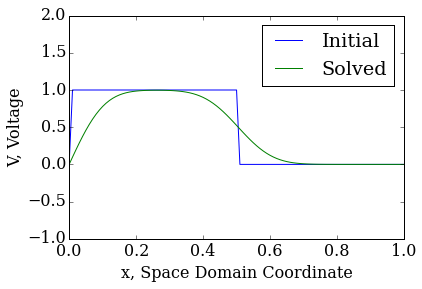

In [49]:
# Standard imports
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Extra Imports for 3d plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Extra imports to avoid warnings for a cleaner presentation
import warnings
warnings.filterwarnings('ignore')

# Setting up basic params
nx = 101 # space steps
nt = 151 # time steps
x = numpy.linspace(0,1,nx) # space domain
t = numpy.linspace(0,1,nt) # time domain
LC = 1 # param, but we can ignore in equation since it's 1
dx = x[1]-x[0] # \Delta x
dt = t[1]-t[0] # \Delta t
sigma = dt/dx # sigma to use in equation
alpha = 1 # initial condition for voltage,

# Writing function for initial value voltage
def init(nx,alpha,rhb,lhb):
    '''
    Function for initial voltage "signal"
    
    Inputs:
        - nx: length of initial value array
        - alpha: value of first half of initial value array
        - rhb: right hand boundary
        - lhb: left hand boundary
    
    Returns: 
        - v0: initial value vector
    '''
    v0 = numpy.zeros(nx)
    v0[0:nx/2+1]=alpha
    v0[0]=lhb
    v0[-1]=rhb
    
    return v0

# Writing function to solve out the voltage
def solver(v0,nt,sigma,rhb,lhb):
    '''
    Define function to solve out the voltage after t.
    
    Inputs:
        - v0: initial voltage "signal"
        - nt: number of times to loop
        - sigma: ratio of delta's, as found in equation 32
        - rhb: right hand boundary
        - lhb left hand boundary
    
    Returns:
        - v: final solution 
    '''
    v = v0.copy() # create copy of initial voltage signal. 
    
    for i in range(1,nt):
        v[1:-1] = (sigma**2/2)*(v[2:]+v[:-2])+v[1:-1]*(1-(sigma**2)) # solve out equation 32
        v[0]=lhb
        v[-1]=rhb
    return v

# Invoking initial condition creater and solver to solve for voltage
volt_init = init(nx,alpha,0,0)
volt = solver(volt_init,nt,sigma,0,0)

# Plotting
pyplot.plot(x,volt_init, label="Initial")
pyplot.plot(x,volt,label="Solved")
pyplot.ylim(-1,2)
pyplot.xlabel("x, Space Domain Coordinate")
pyplot.ylabel("V, Voltage")
pyplot.legend()

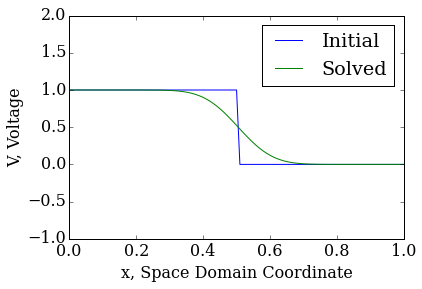

In [50]:
# Standard imports
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Extra Imports for 3d plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Extra imports to avoid warnings for a cleaner presentation
import warnings
warnings.filterwarnings('ignore')

# Setting up basic params
nx = 101 # space steps
nt = 151 # time steps
x = numpy.linspace(0,1,nx) # space domain
t = numpy.linspace(0,1,nt) # time domain
LC = 1 # param, but we can ignore in equation since it's 1
dx = x[1]-x[0] # \Delta x
dt = t[1]-t[0] # \Delta t
sigma = dt/dx # sigma to use in equation
alpha = 1 # initial condition for voltage,

# Writing function for initial value voltage
def init(nx,alpha):
    '''
    Function for initial voltage "signal"
    
    Inputs:
        - nx: length of initial value array
        - alpha: value of first half of initial value array
        - rhb: right hand boundary
        - lhb: left hand boundary
    
    Returns: 
        - v0: initial value vector
    '''
    v0 = numpy.zeros(nx)
    v0[0:nx/2+1]=alpha
    
    return v0

# Writing function to solve out the voltage
def solver(v0,nt,sigma):
    '''
    Define function to solve out the voltage after t.
    
    Inputs:
        - v0: initial voltage "signal"
        - nt: number of times to loop
        - sigma: ratio of delta's, as found in equation 32
        - rhb: right hand boundary
        - lhb left hand boundary
    
    Returns:
        - v: final solution 
    '''
    v = v0.copy() # create copy of initial voltage signal. 
    
    for i in range(1,nt):
        v[1:-1] = (sigma**2/2)*(v[2:]+v[:-2])+v[1:-1]*(1-(sigma**2)) # solve out equation 32
    return v

# Invoking initial condition creater and solver to solve for voltage
volt_init = init(nx,alpha)
volt = solver(volt_init,nt,sigma)

# Plotting
pyplot.plot(x,volt_init, label="Initial")
pyplot.plot(x,volt,label="Solved")
pyplot.ylim(-1,2)
pyplot.xlabel("x, Space Domain Coordinate")
pyplot.ylabel("V, Voltage")
pyplot.legend()

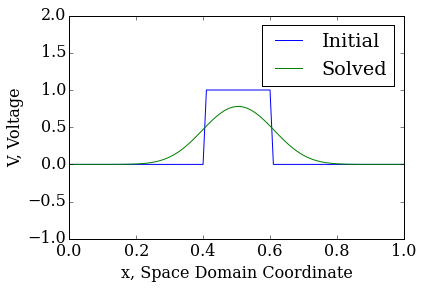

In [51]:
# Standard imports
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Extra Imports for 3d plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Extra imports to avoid warnings for a cleaner presentation
import warnings
warnings.filterwarnings('ignore')

# Setting up basic params
nx = 101 # space steps
nt = 151 # time steps
x = numpy.linspace(0,1,nx) # space domain
t = numpy.linspace(0,1,nt) # time domain
LC = 1 # param, but we can ignore in equation since it's 1
dx = x[1]-x[0] # \Delta x
dt = t[1]-t[0] # \Delta t
sigma = dt/dx # sigma to use in equation
alpha = 1 # initial condition for voltage,

# Writing function for initial value voltage
def init(nx,alpha):
    '''
    Function for initial voltage "signal"
    
    Inputs:
        - nx: length of initial value array
        - alpha: value of first half of initial value array
        - rhb: right hand boundary
        - lhb: left hand boundary
    
    Returns: 
        - v0: initial value vector
    '''
    v0 = numpy.zeros(nx)
    halfpt = nx/2+1
    v0[halfpt-10:halfpt+10]=alpha
    
    return v0

# Writing function to solve out the voltage
def solver(v0,nt,sigma):
    '''
    Define function to solve out the voltage after t.
    
    Inputs:
        - v0: initial voltage "signal"
        - nt: number of times to loop
        - sigma: ratio of delta's, as found in equation 32
        - rhb: right hand boundary
        - lhb left hand boundary
    
    Returns:
        - v: final solution 
    '''
    v = v0.copy() # create copy of initial voltage signal. 
    
    for i in range(1,nt):
        v[1:-1] = (sigma**2/2)*(v[2:]+v[:-2])+v[1:-1]*(1-(sigma**2)) # solve out equation 32
    return v

# Invoking initial condition creater and solver to solve for voltage
volt_init = init(nx,alpha)
volt = solver(volt_init,nt,sigma)

# Plotting
pyplot.plot(x,volt_init, label="Initial")
pyplot.plot(x,volt,label="Solved")
pyplot.ylim(-1,2)
pyplot.xlabel("x, Space Domain Coordinate")
pyplot.ylabel("V, Voltage")
pyplot.legend()

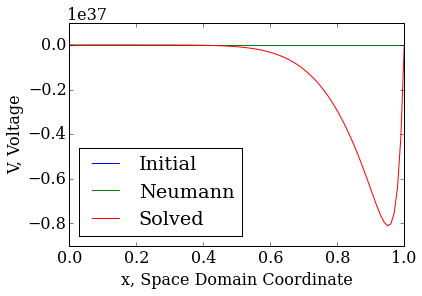

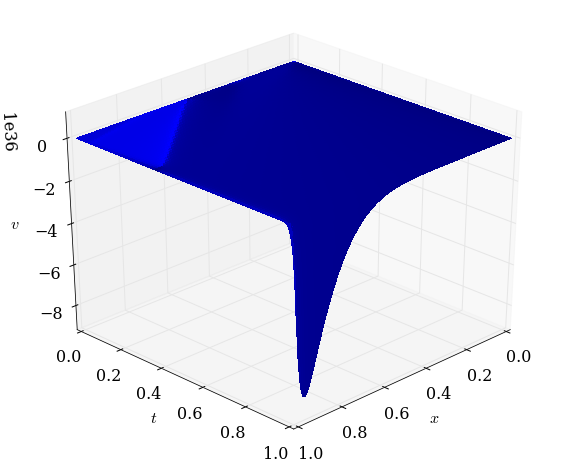

In [52]:
# Standard imports
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Extra Imports for 3d plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Extra imports to avoid warnings for a cleaner presentation
import warnings
warnings.filterwarnings('ignore')

# Setting up basic params
nx = 101 # space steps
nt = 151 # time steps
x = numpy.linspace(0,1,nx) # space domain
t = numpy.linspace(0,1,nt) # time domain
LC = 1 # param, but we can ignore in equation since it's 1
dx = x[1]-x[0] # \Delta x
dt = t[1]-t[0] # \Delta t
sigma = dt/dx # sigma to use in equation
alpha = 1 # initial condition for voltage,

# Writing function for initial value voltage
def init(nx,alpha,rhb,lhb):
    '''
    Function for initial voltage "signal"
    
    Inputs:
        - nx: length of initial value array
        - alpha: value of first half of initial value array
        - rhb: right hand boundary
        - lhb: left hand boundary
    
    Returns: 
        - v0: initial value vector
    '''
    v0 = numpy.zeros(nx)
    v0[0:nx/2+1]=alpha
    v0[0]=lhb
    v0[-1]=rhb
    
    return v0


# Writing function to solve out the voltage at nt = 1
def second_init(v0,nt,sigma,rhb,lhb):
    '''
    Define function to solve out the voltage after nt = 1, to find second initial condition.
    
    Inputs:
        - v0: initial voltage "signal"
        - nt: number of times to loop
        - sigma: ratio of delta's, as found in equation 32
        - rhb: right hand boundary
        - lhb left hand boundary
    
    Returns:
        - v: second initial condition solution - holds neumann initial condition
    '''
    v = v0.copy() # create copy of initial voltage signal. 
    
    for i in range(1,nt):
        v[1:-1] = (sigma**2/2)*(v[2:]+v[:-2])+v[1:-1]*(1-(sigma**2)) # solve out equation 32
        v[0]=lhb
        v[-1]=rhb
    return v

# defining functiong for getting and storing all results 
def solver(v0,v1,sigma,nt,nx):
    '''
    Define function to solve out the voltage after nt = 2+, to find full solution.
    
    Inputs:
        - v0: initial voltage "signal"
        - v1: Neumann Initial Voltage Condition
        - sigma: ratio of delta's, as found in equation 24 (though not explicitly written as a function of sigma)
        - nt: number of time-steps to loop over
        - nx: number of space-steps to loop over
        
        - rhb: right hand boundary
        - lhb left hand boundary
    
    Returns:
        - v: solved array of all timesteps
    '''
    v = numpy.ones([nt,nx])
    v[0,:]=v0
    v[1,:]=v1
    for n in range(2,nt):
        for i in range(0,nx-1):
            v[n,i]=(sigma**2)*(v[n-1,i+1] + v[n,i-1])-v[n-2,i]+2*(v[n-1,i])*(1-sigma**2)
        v[n,0]=0
        v[n,-1]=0
    
    return v

# Creating the plot3d method, to visualize v as a function of both x and y, taken from module 5.
def plot3d(x, y, p):
    fig = pyplot.figure(figsize=(10,8), dpi=1000)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    ax.plot_surface(X,Y,p[:], rstride=1, cstride=1,
            linewidth=0, antialiased=False) # don't need to save this surface

    ax.set_xlim(0,1) # Domain given in problem
    ax.set_ylim(0,1) # Range given in problem
    ax.set_xlabel('$x$')
    ax.set_ylabel('$t$')
    ax.set_zlabel('$v$')
    ax.view_init(30,45)

# Invoking functions to create the solution matrix
volt_init = init(nx,alpha,0,0)
volt2 = second_init(volt_init,nt,sigma,0,0)
volt = solver(volt_init, volt2, sigma, nt, nx)

# Plotting in 2D, taking the last iteration of the solution
pyplot.plot(x,volt_init, label="Initial")
pyplot.plot(x,volt2,label="Neumann")
pyplot.plot(x,volt[-1,:],label="Solved")
pyplot.xlabel("x, Space Domain Coordinate")
pyplot.ylabel("V, Voltage")
pyplot.legend(loc='lower left')

# Plotting in 3D
plot3d(x,t,volt)